<a href="https://colab.research.google.com/github/samer-glitch/Trustworthy-AI-Data-Pipeline-Framework/blob/main/1_Data_Collection_and_Initial_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset from a CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import logging

# Configure logging to log to both file and console
logger = logging.getLogger()  # Get the root logger
logger.setLevel(logging.INFO)

# Create a file handler
file_handler = logging.FileHandler('data_collection.log')
file_handler.setLevel(logging.INFO)

# Create a stream handler to print to console
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Create a logging format
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

# Log data collection details
logger.info('Dataset loaded from Titanic dataset at URL: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
logger.info('Data shape: %s', df.shape)
logger.info('Missing values detected: %s', df.isnull().sum().to_dict())


INFO:root:Dataset loaded from Titanic dataset at URL: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
2024-10-27 21:09:33,898 - INFO - Dataset loaded from Titanic dataset at URL: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
INFO:root:Data shape: (891, 12)
2024-10-27 21:09:33,905 - INFO - Data shape: (891, 12)
INFO:root:Missing values detected: {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}
2024-10-27 21:09:33,915 - INFO - Missing values detected: {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [ ]:
# Open and read the content of the log file
with open('data_collection.log', 'r') as file:
    log_contents = file.read()

# Print the log file content
print(log_contents)
# The dataset's source and characteristics (number of rows and columns) are being logged manually to a file, ensuring that the data collection step is traceable and transparent.

Data collected from Titanic dataset on Kaggle
Dataset loaded with 891 rows and 12 columns.
Data collected from Titanic dataset on Kaggle
Dataset loaded with 891 rows and 12 columns.
2024-10-27 21:09:33,898 - INFO - Dataset loaded from Titanic dataset at URL: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
2024-10-27 21:09:33,905 - INFO - Data shape: (891, 12)
2024-10-27 21:09:33,915 - INFO - Missing values detected: {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}



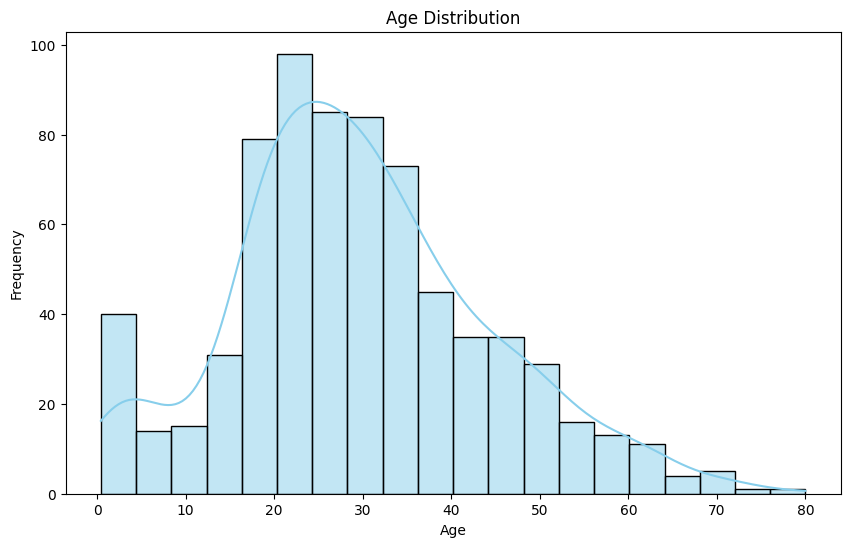

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

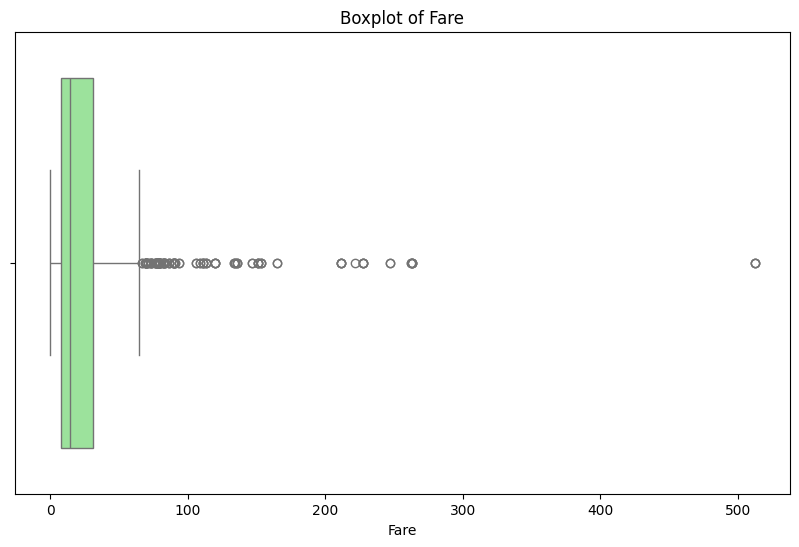

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=df, color='lightgreen')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

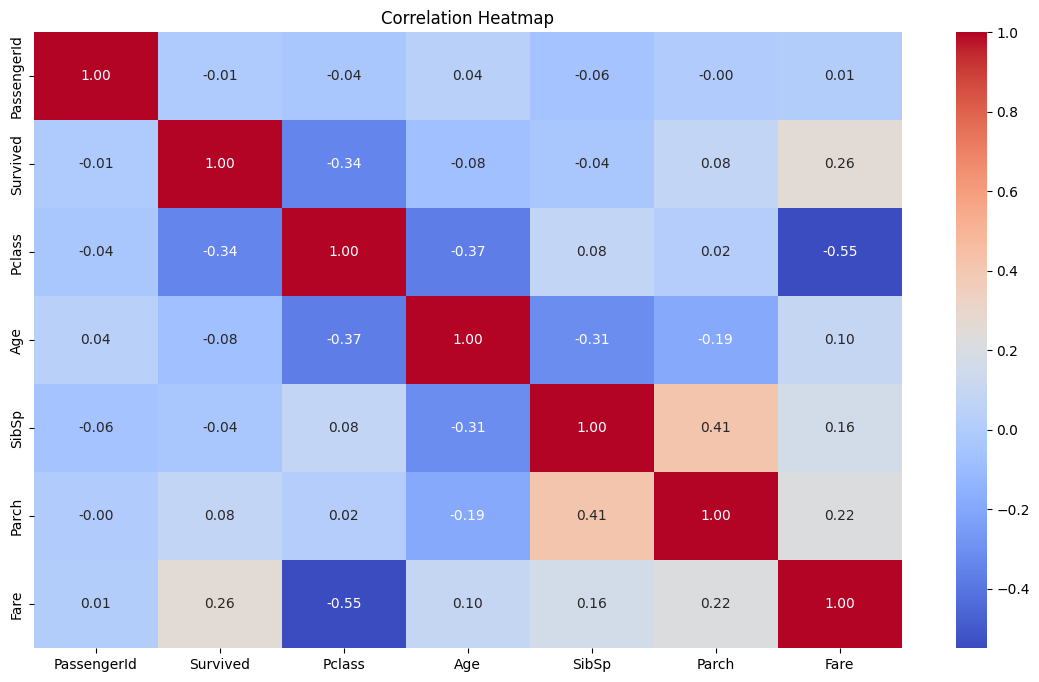

In [ ]:
# Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns from the dataset
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns only
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


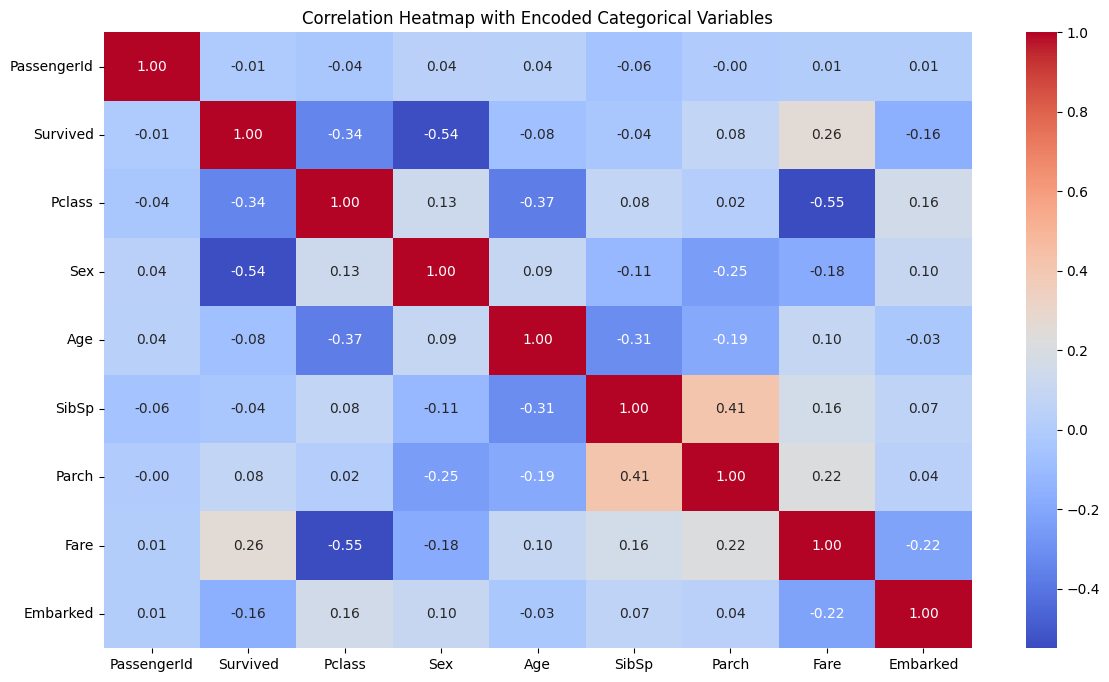

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to work with
df_encoded = df.copy()

# Encode categorical columns
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Now, select the numerical columns and the newly encoded categorical columns
df_numeric = df_encoded.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
corr_matrix = df_numeric.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()
